In [1]:
import sys
import os
import yaml
import numpy as np

# # Add src directory to sys.path for imports
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

# # Now you can import your class
# from usgsgaugekrig import USGSLoader, USGSKrig

from loaders.usgs_loader import USGSLoader
from interpolation.usgs_krig import USGSKrig

In [8]:
cfg = "../configs/usgsgaugekrig.yaml"
loader = USGSLoader(cfg)
year, month, day = 2002, 12, 10
data = loader.get_streamflow(year, month, day)

Summary for 2002-12-10
  - Observations: 150
  - Min: 0.00, Max: 26.73, Mean: 2.33


In [9]:
krig = USGSKrig(data, cfg, year, month, day)

In [10]:
# Compute kriging first
krig.compute_kriging()

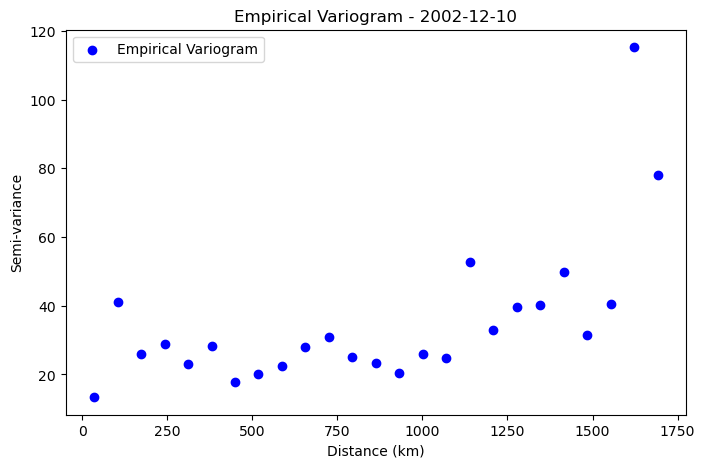

In [11]:
# Plot the variogram
krig.plot_variogram()

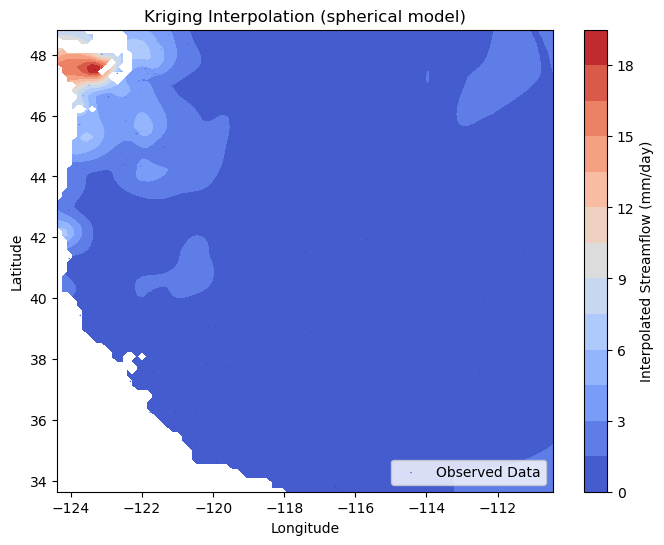

In [12]:
# Generate the kriging interpolation map
krig.map_krig_interpolation()

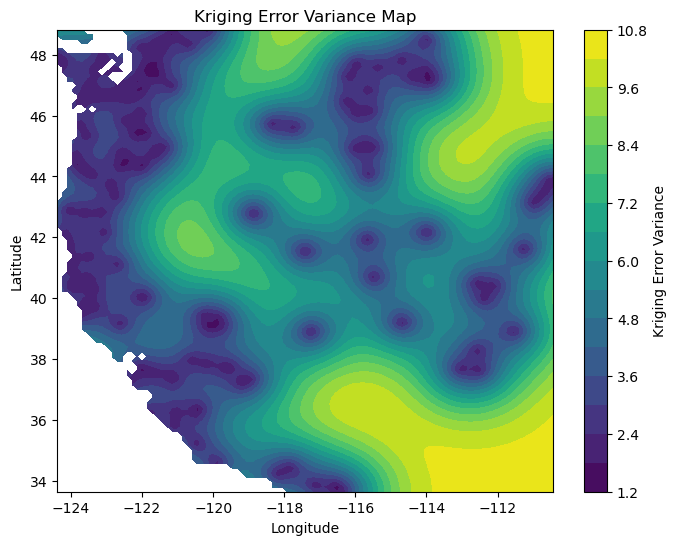

In [13]:
# Generate the kriging error variance map
krig.map_krig_error_variance()